In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("AEP_hourly.csv")

print("First Five Rows ","\n")
print(df.head(5),"\n")


print("Information About Dataset","\n")
print(df.info(),"\n")


print("Describe the Dataset ","\n")
print(df.describe(),"\n")


print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [3]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time

dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,Friday


In [4]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



Text(0.5, 1.0, 'Energy Consumption According to Year')

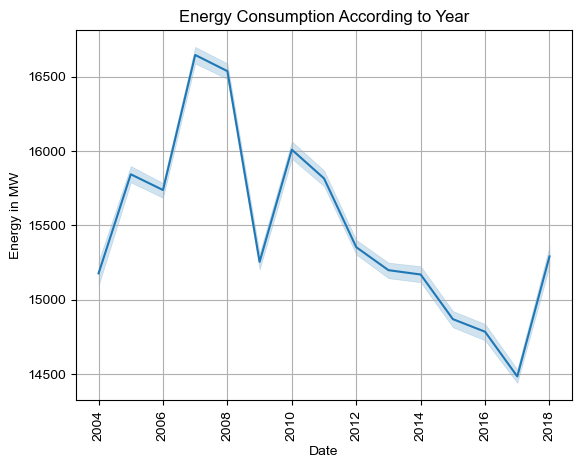

In [5]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)


for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

## consumption for each year

In [6]:
import pandas as pd



df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


if df['Datetime'].isnull().any():
    print("Warning: Some datetime values could not be converted!")

print("Datatype of 'Datetime' column after conversion:", df['Datetime'].dtype)


df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Time'] = df['Datetime'].dt.time


print(df)


Datatype of 'Datetime' column after conversion: datetime64[ns]
                  Datetime   AEP_MW  Month  Year        Date      Time  Day
0      2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00   31
1      2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00   31
2      2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00   31
3      2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00   31
4      2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00   31
...                    ...      ...    ...   ...         ...       ...  ...
121268 2018-01-01 20:00:00  21089.0      1  2018  2018-01-01  20:00:00    1
121269 2018-01-01 21:00:00  20999.0      1  2018  2018-01-01  21:00:00    1
121270 2018-01-01 22:00:00  20820.0      1  2018  2018-01-01  22:00:00    1
121271 2018-01-01 23:00:00  20415.0      1  2018  2018-01-01  23:00:00    1
121272 2018-01-02 00:00:00  19993.0      1  2018  2018-01-02  00:00:00    2

[121273 rows x 7 columns

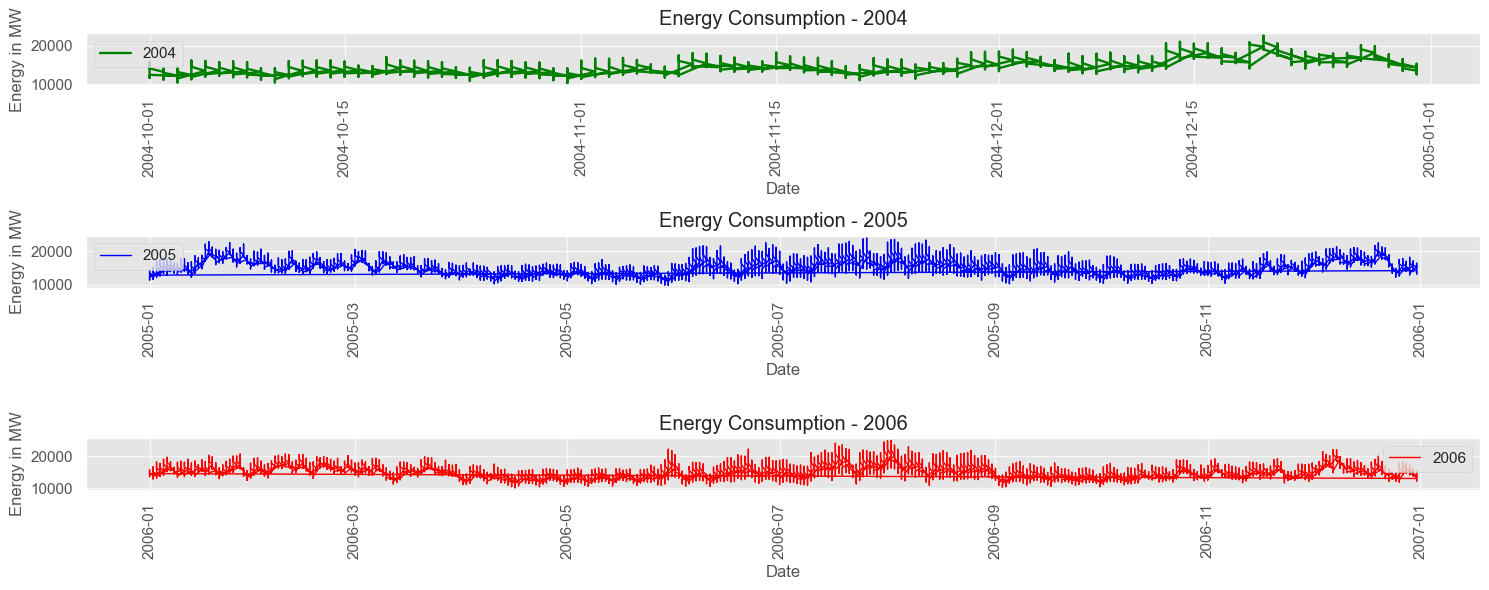

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style

# Set the style
style.use('ggplot')

# Ensure 'Year' is extracted correctly
df['Year'] = df['Datetime'].dt.year  # Ensure Year is available
df['Date'] = df['Datetime'].dt.date  # Extract date for x-axis

# Create the figure and subplots
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Filter data for each year
df_2004 = df[df['Year'] == 2004]
df_2005 = df[df['Year'] == 2005]
df_2006 = df[df['Year'] == 2006]

# Plot for 2004
y_2004 = df_2004["AEP_MW"].to_list()
x_2004 = df_2004["Date"].to_list()
ax1.plot(x_2004, y_2004, color="green", linewidth=1.7, label="2004")

# Plot for 2005
y_2005 = df_2005["AEP_MW"].to_list()
x_2005 = df_2005["Date"].to_list()
ax2.plot(x_2005, y_2005, color="blue", linewidth=1, label="2005")

# Plot for 2006
y_2006 = df_2006["AEP_MW"].to_list()
x_2006 = df_2006["Date"].to_list()
ax3.plot(x_2006, y_2006, color="red", linewidth=1, label="2006")

# Set the figure size
plt.rcParams["figure.figsize"] = (18, 6)

# Titles and labels
ax1.set_title("Energy Consumption - 2004")
ax2.set_title("Energy Consumption - 2005")
ax3.set_title("Energy Consumption - 2006")

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("Date")
    ax.set_ylabel("Energy in MW")
    ax.grid(True, alpha=0.7)
    ax.legend()

# Rotate x-axis labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(90)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(90)

# Display the plot
plt.tight_layout()
plt.show()


### Energy distribution


C:\Users\USER\AppData\Local\Temp\ipykernel_3704\4057317461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AEP_MW"])


Text(0.5, 1.0, 'Energy Distribution')

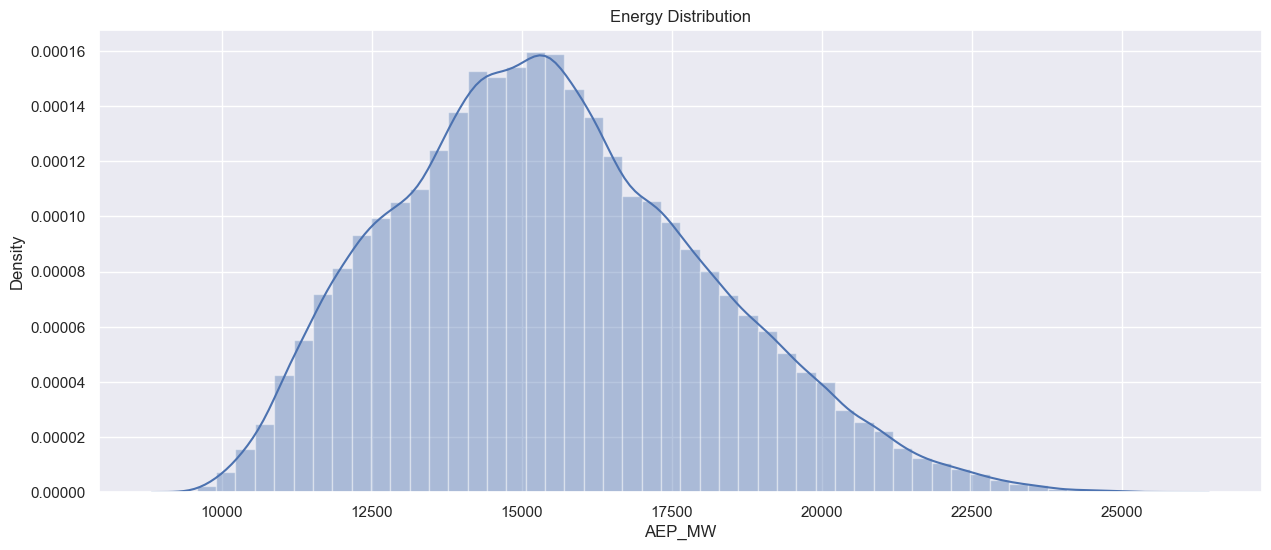

In [7]:
sns.distplot(df["AEP_MW"])
plt.title("Energy Distribution")

### training and testing data

In [28]:
TestData = df.tail(100)

Training_Set = df.iloc[:,0:1]

Training_Set = Training_Set[:-60]
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (121213, 1)
Test Set Shape  (100, 6)


In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [30]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(121153, 60, 1)
(121153, 1)


In [31]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(121153, 60, 1)

### Model

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 20, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 20, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 20, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 20))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 330s 84ms/step - loss: 0.0133
Epoch 2/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 320s 84ms/step - loss: 0.0031
Epoch 3/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 340s 89ms/step - loss: 0.0017
Epoch 4/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 346s 80ms/step - loss: 0.0014
Epoch 5/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 336s 89ms/step - loss: 0.0012
Epoch 6/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 345s 91ms/step - loss: 0.0012
Epoch 7/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 303s 80ms/step - loss: 0.0012
Epoch 8/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 328s 81ms/step - loss: 0.0011
Epoch 9/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 407s 104ms/step - loss: 0.0011
Epoch 10/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 316s 84ms/step - loss: 0.0011
Epoch 11/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 314s 83ms/step - loss: 0.0010
Epoch 12/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 390s 101ms/step - loss: 0.0010
Epoch 13/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 332s 88ms/step - loss: 0.0010
Epoch 14/20
3787/3787 ━━━━━━━━━━━━━━━━━━━━ 383s 88ms/step 

### Test data

In [35]:
TestData.head(2)

,AEP_MW,Month,Year,Date,Time,Day
Datetime,,,,,,
2018-01-05 21:00:00,21863.0,1,2018,2018-01-05,21:00:00,5
2018-01-05 22:00:00,21554.0,1,2018,2018-01-05,22:00:00,5


In [36]:
TestData.shape

(100, 6)

In [37]:
df.shape

(121273, 6)

In [38]:
Df_Total = pd.concat((df[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [39]:
Df_Total.shape

(121373, 1)

In [40]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [41]:


inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

E:\Users\USER\anaconda3\envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step


In [43]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [44]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

### Predicted values for future

In [45]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-01-05 21:00:00,21863.0,18918.167969
1,2018-01-05 22:00:00,21554.0,21055.158203
2,2018-01-05 23:00:00,21216.0,21143.085938
3,2018-01-06 00:00:00,20708.0,21289.535156
4,2018-01-04 01:00:00,18193.0,20382.179688
...,...,...,...
95,2018-01-01 20:00:00,21089.0,20981.503906
96,2018-01-01 21:00:00,20999.0,20978.804688
97,2018-01-01 22:00:00,20820.0,20644.949219
98,2018-01-01 23:00:00,20415.0,20315.468750


In [46]:
print(Machine_Df)

                  Date  TrueMegaWatt  PredictedMeagWatt
0  2018-01-05 21:00:00       21863.0       18918.167969
1  2018-01-05 22:00:00       21554.0       21055.158203
2  2018-01-05 23:00:00       21216.0       21143.085938
3  2018-01-06 00:00:00       20708.0       21289.535156
4  2018-01-04 01:00:00       18193.0       20382.179688
..                 ...           ...                ...
95 2018-01-01 20:00:00       21089.0       20981.503906
96 2018-01-01 21:00:00       20999.0       20978.804688
97 2018-01-01 22:00:00       20820.0       20644.949219
98 2018-01-01 23:00:00       20415.0       20315.468750
99 2018-01-02 00:00:00       19993.0       19689.814453

[100 rows x 3 columns]
